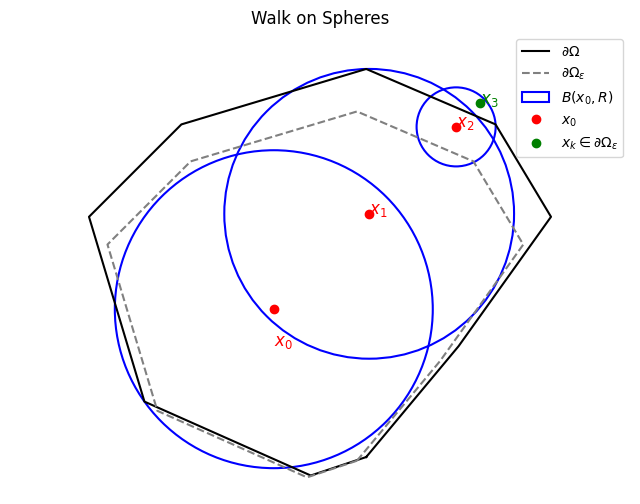

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circle(ax, center, radius, color, label=None):
    circle = plt.Circle(center, radius, color=color, fill=False, lw=1.5, label=label)
    ax.add_artist(circle)

def compute_max_radius(center, boundary):
    distances = np.sqrt(np.sum((boundary - center)**2, axis=1))
    return np.min(distances)

def is_near_boundary(center, boundary, epsilon=0.05):
    distances = np.sqrt(np.sum((boundary - center)**2, axis=1))
    return np.min(distances) <= epsilon

fig, ax = plt.subplots(figsize=(8, 6))

boundary = np.array([
    [0.5, 0.2], [1.0, 0.8], [1.5, 1.5], [1.2, 2.0], 
    [0.5, 2.3], [-0.5, 2.0], [-1.0, 1.5], [-0.7, 0.5], [0.2, 0.1], [0.5, 0.2]
])
boundary = np.append(boundary, [boundary[0]], axis=0)
ax.plot(boundary[:, 0], boundary[:, 1], color='black', linewidth=1.5, label=r'$\partial \Omega$')

epsilon_boundary = boundary * 0.9
ax.plot(epsilon_boundary[:, 0], epsilon_boundary[:, 1], color='gray', linestyle='--', label=r'$\partial \Omega_\epsilon$')


centers = [(0.0, 1.0)]
radii = []
epsilon = 0.1 
for _ in range(3):
    current_center = centers[-1]
    max_radius = compute_max_radius(current_center, boundary)
    if is_near_boundary(current_center, boundary, epsilon):
        break 
    radii.append(max_radius)
    next_center = (current_center[0] + 0.6 * max_radius, current_center[1] + 0.6 * max_radius)
    centers.append(next_center)

for i, (center, radius) in enumerate(zip(centers, radii)):
    plot_circle(ax, center, radius, color="blue", label=r'$B(x_{%d}, R)$' % i if i == 0 else None)
    ax.plot(center[0], center[1], 'ro', label=r'$x_{%d}$' % i if i == 0 else None)

final_point = centers[-1]
ax.plot(final_point[0], final_point[1], 'go', label=r'$x_k \in \partial \Omega_\epsilon$')

ax.text(centers[0][0], centers[0][1] - 0.2, r'$x_0$', fontsize=12, color='red')
for i, center in enumerate(centers[1:], start=1):
    ax.text(center[0], center[1], r'$x_%d$' % i, fontsize=12, color='red' if i < len(centers) - 1 else 'green')

ax.set_xlim([-1.5, 2.0])
ax.set_ylim([0, 2.5])
ax.set_aspect('equal', adjustable='datalim')
ax.axis('off') 
ax.set_title("Walk on Spheres")
ax.legend(loc='upper right')
ax.grid(False)

plt.show()
